In [ ]:
import nltk
nltk.download()

In [11]:
import pandas as pd

df_wines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wineReviews.csv', encoding='ISO-8859-1')
df_wines.head()

,wineId,country,description,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,219,Hungary,From a vineyard in Northern Tokaj this dry Fur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,271,Greece,Lively aromas of lemon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,308,Greece,This fuller-bodied white blend offers pineapple,easygoing white that is perfect for everyday ...,vegetable and fish meals.,NaN,NaN,NaN,NaN,NaN
3,351,Hungary,This amber-colored Hungarian stunner has ether...,canned apricot and fresh pear. It is silky sm...,pear tart and baked sweet apples. The acidity...,NaN,NaN,NaN,NaN,NaN
4,377,Greece,A fresh,forward fruit.,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_wines.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)
df_wines.head()

,wineId,country,description
0,219,Hungary,From a vineyard in Northern Tokaj this dry Fur...
1,271,Greece,Lively aromas of lemon
2,308,Greece,This fuller-bodied white blend offers pineapple
3,351,Hungary,This amber-colored Hungarian stunner has ether...
4,377,Greece,A fresh


In [13]:
df_wines.groupby(['country']).count()

,wineId,description
country,,
Croatia,73,73
Greece,466,466
Hungary,146,146
Slovenia,87,87


In [23]:
# zdruzevanje vseh ocen v eno besedilo
from nltk.tokenize import word_tokenize

full_description = ''.join(df_wines['description'])
full_description

tokeni = word_tokenize(full_description)
tokeni = [beseda.lower() for beseda in tokeni]
tokeni[:10]

['from',
 'a',
 'vineyard',
 'in',
 'northern',
 'tokaj',
 'this',
 'dry',
 'furmint',
 'has']

In [24]:
# frekvenca pojavitve
from nltk import FreqDist

tokeni_frequence = FreqDist(tokeni)
for beseda, pogostost in tokeni_frequence.most_common(20):
  print(f'{beseda:<15}: {pogostost}')

of             : 457
and            : 372
the            : 196
aromas         : 174
a              : 163
with           : 138
.              : 130
this           : 116
on             : 116
nose           : 110
wine           : 108
is             : 97
white          : 95
has            : 88
in             : 82
blend          : 69
red            : 69
flavors        : 62
lemon          : 57
from           : 54


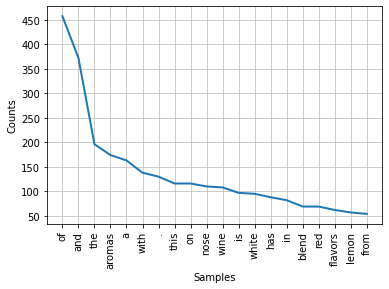

In [25]:
# graf za 20 tokenov, ki se najveckrat pojavijo
tokeni_frequence.plot(20, cumulative=False)

In [31]:
# odstranjevanje stop_words iz celotnega besedila
from nltk.corpus import stopwords
import string

stop_list = stopwords.words('english') + list(string.punctuation)

tokeni_brez_stop = [token for token in tokeni if token not in stop_list]

tokeni_frequence_brez_stop = FreqDist(tokeni_brez_stop)

for beseda, pogostost in tokeni_frequence_brez_stop.most_common(5):
  print(f'{beseda:<15}: {pogostost}')

aromas         : 174
nose           : 110
wine           : 108
white          : 95
blend          : 69


In [36]:
# bigrami in trigrami, stemming
from nltk.stem import PorterStemmer
from nltk import ngrams

stemmer = PorterStemmer()

tokeni_stemm = [stemmer.stem(beseda) for beseda in tokeni_brez_stop]

tokeni_frequence_stem = FreqDist(tokeni_stemm)
#for beseda, pogostost in tokeni_frequence_stem.most_common(20):
  #print(f'{beseda:<15}: {pogostost}')

par = FreqDist(ngrams(tokeni_stemm, 2))
for beseda, pogostost in par.most_common(4):
  print(f'Najpogostejsi bigrami: {str(beseda):<15}: {pogostost}')

trojcki = FreqDist(ngrams(tokeni_stemm, 3))
for beseda, pogostost in trojcki.most_common(4):
  print(f'Najpogostejsi trigrami: {str(beseda):<15}: {pogostost}')

Najpogostejsi bigrami: ('start', 'aroma'): 19
Najpogostejsi bigrami: ('tropic', 'fruit'): 15
Najpogostejsi bigrami: ('aroma', 'lead'): 14
Najpogostejsi bigrami: ('red', 'blend'): 12
Najpogostejsi trigrami: ('white', 'start', 'aroma'): 5
Najpogostejsi trigrami: ('dri', 'furmint', 'aroma'): 4
Najpogostejsi trigrami: ('wine', 'made', '100'): 4
Najpogostejsi trigrami: ('red', 'start', 'aroma'): 4


In [37]:
# funkcija za procesiranje opisa 
stemmer2 = PorterStemmer()
stop_list2 = stopwords.words('english') + list(string.punctuation)

def procesirajOpis(opis: str):
  tokeni = word_tokenize(opis)
  tokeni = [token.lower() for token in tokeni if token not in stop_list]
  tokeni = [stemmer2.stem(token) for token in tokeni]
  return ' '.join(tokeni)

procesirajOpis('Lively aromas of lemon')

'live aroma lemon'

In [39]:
# ustvarjanje novega stolpca processed
df_wines['processed'] = df_wines['description'].apply(procesirajOpis)
df_wines.head()

,wineId,country,description,processed
0,219,Hungary,From a vineyard in Northern Tokaj this dry Fur...,from vineyard northern tokaj dri furmint aroma...
1,271,Greece,Lively aromas of lemon,live aroma lemon
2,308,Greece,This fuller-bodied white blend offers pineapple,thi fuller-bodi white blend offer pineappl
3,351,Hungary,This amber-colored Hungarian stunner has ether...,thi amber-color hungarian stunner ether aroma ...
4,377,Greece,A fresh,a fresh


In [60]:
# priprava podatkov
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1), # Naredi le unigram-e
                             lowercase=True)

vhod = vectorizer.fit_transform(df_wines['processed']) # Obdelamo predprocesirano besedilo

# Izpišimo vse tokene (feature-e), ki jih vectorizer naredi
print(vectorizer.get_feature_names())
print(f'Vseh feature-ov je {len(vectorizer.get_feature_names())}')

['100', '15', '20', '2010', '30', '33', '34', '35', '40', '50', '60', '65', '70', '72', '80', '86', 'abund', 'abv', 'accent', 'access', 'acid', 'add', 'administ', 'aerat', 'age', 'agiorgitiko', 'agiorgitko', 'air', 'alfalfa', 'all', 'allspic', 'allur', 'almost', 'along', 'alreadi', 'amber', 'ambiti', 'american', 'an', 'ancient', 'anis', 'anoth', 'apart', 'appeal', 'appl', 'approach', 'apricot', 'aroma', 'aromat', 'array', 'asproudiï', 'assert', 'assyrtico', 'assyrtiko', 'aszï', 'athiri', 'attack', 'austria', 'axia', 'babic', 'bake', 'balanc', 'banana', 'bang', 'bar', 'barnyard', 'barrel', 'bartlett', 'batiki', 'beach', 'beat', 'beauti', 'becom', 'beeswax', 'begin', 'berri', 'berry', 'beï', 'big', 'bikavï', 'biodynam', 'bit', 'bitter', 'black', 'blackberri', 'blanc', 'blauburg', 'blaufrï', 'blend', 'blossom', 'blow', 'blueberri', 'blush', 'boast', 'bodi', 'bold', 'bone', 'bordeaux', 'both', 'botryti', 'bottl', 'bounc', 'bouquet', 'box', 'brambl', 'brda', 'bread', 'bright', 'brilliant', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
# klasifikacija ze procesiranega besedila
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(vhod, df_wines['country'], test_size=0.25, random_state=123)

svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
accuracy_score(y_test, predictions)

0.7150259067357513

In [62]:
# klasifikacija nad bigrami
vectorizer2 = TfidfVectorizer(ngram_range=(1,2), # Naredi le bigram-e
                             lowercase=True)

vhod2 = vectorizer2.fit_transform(df_wines['processed']) # Obdelamo procesirano besedilo

X_train2, X_test2, y_train2, y_test2 = train_test_split(vhod2, df_wines['country'], test_size=0.25, random_state=123)
svc2 = SVC()
svc2.fit(X_train2, y_train2)
predictions2 = svc2.predict(X_test2)
accuracy_score(y_test2, predictions2)

0.689119170984456

In [63]:
# klasifikacija nad trigrami
vectorizer3 = TfidfVectorizer(ngram_range=(1,3),
                              lowercase=True)

vhod3 = vectorizer3.fit_transform(df_wines['processed'])

X_train3, X_test3, y_train3, y_test3 = train_test_split(vhod3, df_wines['country'], test_size=0.25, random_state=123)
svc3 = SVC()
svc3.fit(X_train3, y_train3)
predictions3 = svc3.predict(X_test3)
accuracy_score(y_test3, predictions3)

0.6735751295336787

In [64]:
# neprecisceno besedilo
vectorizer4 = TfidfVectorizer(ngram_range=(1,1),
                              preprocessor=procesirajOpis)

vhod4 = vectorizer4.fit_transform(df_wines['description'])

X_train4, X_test4, y_train4, y_test4 = train_test_split(vhod4, df_wines['country'], test_size=0.25, random_state=123)
svc4 = SVC()
svc4.fit(X_train4, y_train4)
predictions4 = svc4.predict(X_test4)
accuracy_score(y_test4, predictions4)

0.7150259067357513